In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import sklearn
import pandas as pd
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from catboost import CatBoostClassifier
import numpy as np

In [2]:
class CNN_layer(nn.Module):
    def __init__(self, in_channels=1, out_channels=128, padding='same', kernel_size=7, dropout=0.4):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=padding)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=padding)
        self.norm = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = F.elu(self.conv1(x))        
        x = F.elu(self.conv2(x))        
        x = self.dropout(x)              
        x = self.norm(x)                
        return x


class CNN_net(nn.Module):
    def __init__(self, dropout=0.4):
        super().__init__()
        

        self.layer1 = CNN_layer(in_channels=1, out_channels=128, kernel_size=7, dropout=dropout)
        self.layer2 = CNN_layer(in_channels=128, out_channels=64, kernel_size=5, dropout=dropout)
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(64*31, 120)
        self.dropout1 = nn.Dropout(dropout)
        self.dense2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(dropout)
        self.dense3 = nn.Linear(60, 30)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.flatten(x)
        x = F.elu(self.dense1(x))
        x = self.dropout1(x)
        x = F.elu(self.dense2(x))
        x = self.dropout2(x)
        x = F.elu(self.dense3(x))
        return x



        

In [3]:
data = pd.read_csv("DSL-StrongPasswordData.csv")
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [4]:
data["subject"].unique()



array(['s002', 's003', 's004', 's005', 's007', 's008', 's010', 's011',
       's012', 's013', 's015', 's016', 's017', 's018', 's019', 's020',
       's021', 's022', 's024', 's025', 's026', 's027', 's028', 's029',
       's030', 's031', 's032', 's033', 's034', 's035', 's036', 's037',
       's038', 's039', 's040', 's041', 's042', 's043', 's044', 's046',
       's047', 's048', 's049', 's050', 's051', 's052', 's053', 's054',
       's055', 's056', 's057'], dtype=object)

In [5]:
genuine  = data[data["subject"]=="s002"] #users02 is genuine login arttempt
imposter = data[data["subject"]=="s003"] #users03 is imposter 


In [6]:
histdata = genuine.iloc[:,[3, 4 , 5 , 6 , 7 , 8]]

histdata1 = histdata.iloc[:,[0]]
histdata2 = histdata.iloc[:,[1]]
histdata3 = histdata.iloc[:,[2]]
histdata4 = histdata.iloc[:,[3]]
histdata5 = histdata.iloc[:,[4]]
histdata6 = histdata.iloc[:,[5]]

array([[<Axes: title={'center': 'UD.t.i'}>]], dtype=object)

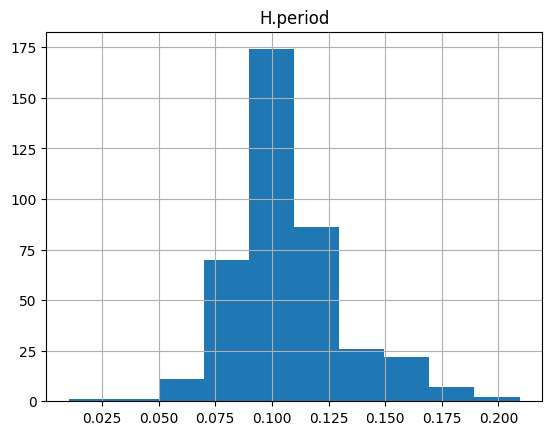

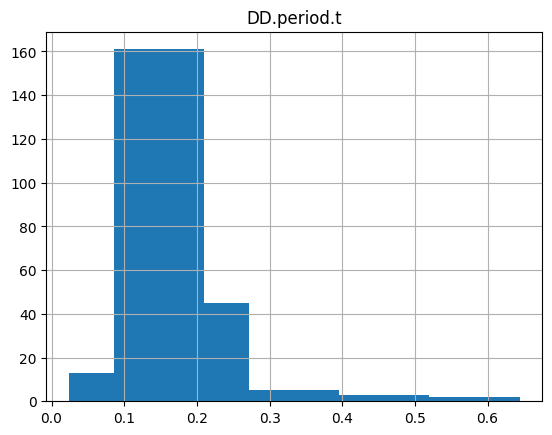

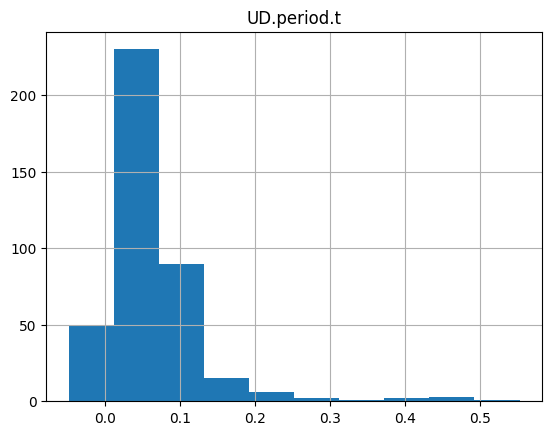

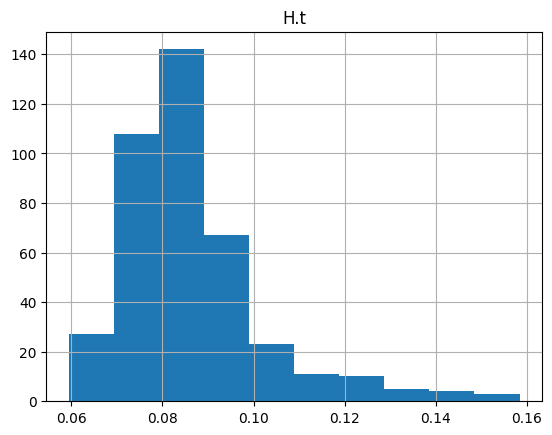

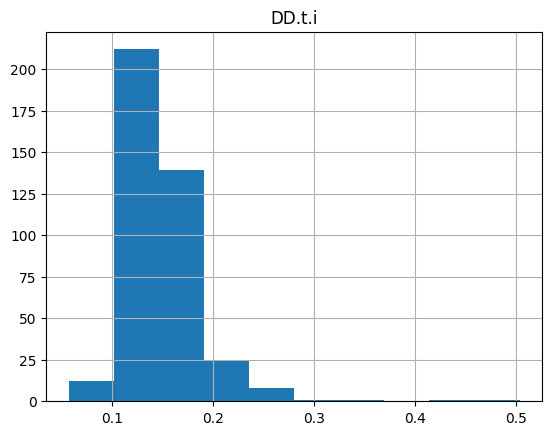

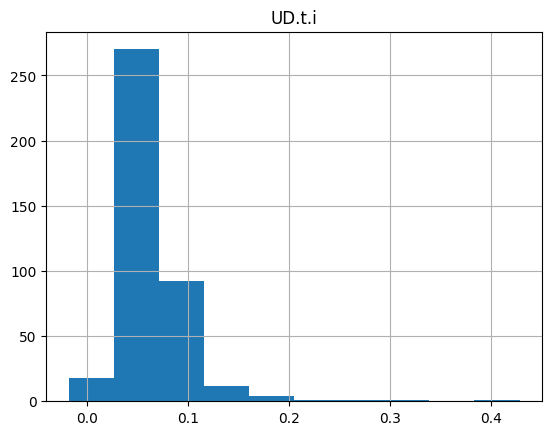

In [7]:
histdata1.hist()
histdata2.hist()
histdata3.hist()
histdata4.hist()
histdata5.hist()
histdata6.hist()

array([[<Axes: title={'center': 'UD.t.i'}>]], dtype=object)

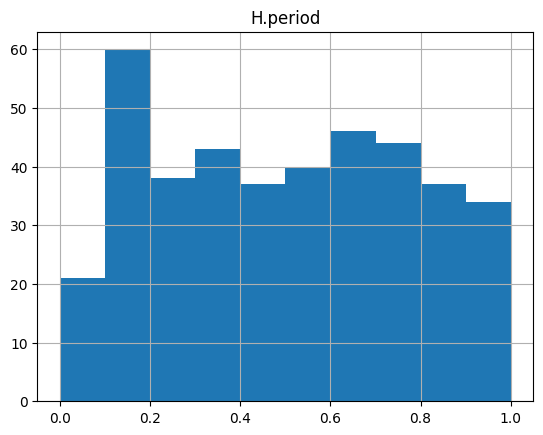

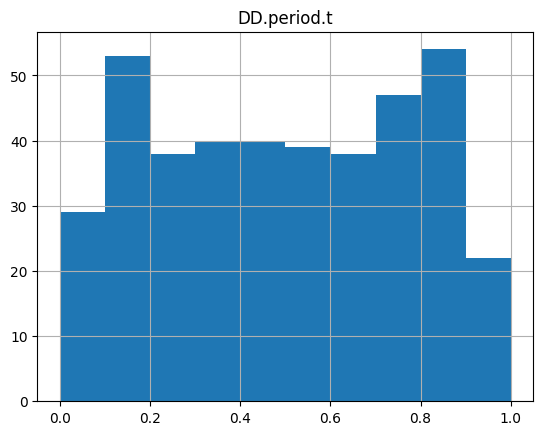

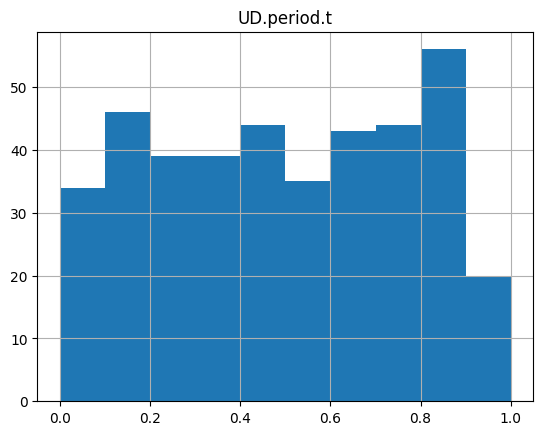

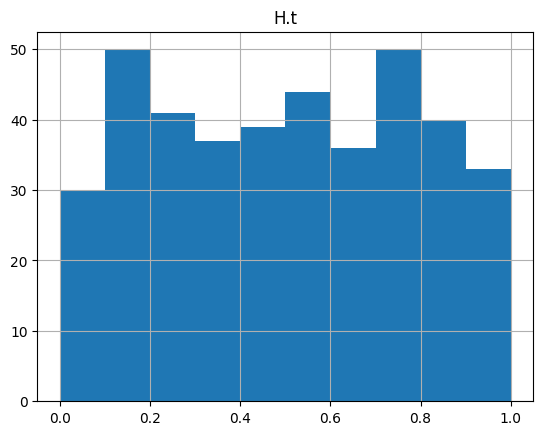

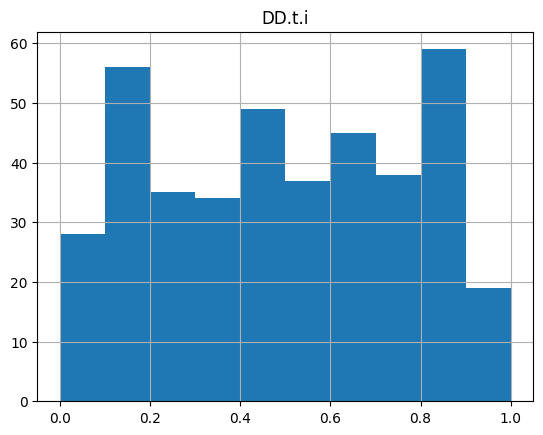

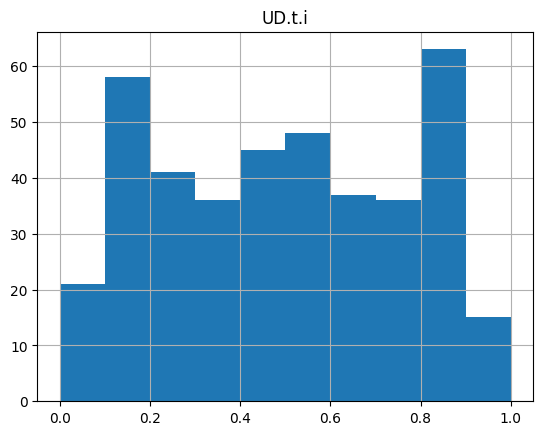

In [8]:
transformed_histdata = pd.DataFrame(quantile_transform(histdata,n_quantiles=10, random_state=0, copy=True))

transformed_histdata.columns =['H.period', 'DD.period.t', 'UD.period.t', 'H.t' ,  'DD.t.i' ,   'UD.t.i' ]
histdata1 = transformed_histdata.iloc[:,[0]]
histdata2 = transformed_histdata.iloc[:,[1]]
histdata3 = transformed_histdata.iloc[:,[2]]
histdata4 = transformed_histdata.iloc[:,[3]]
histdata5 = transformed_histdata.iloc[:,[4]]
histdata6 = transformed_histdata.iloc[:,[5]]
histdata1.hist()
histdata2.hist()
histdata3.hist()
histdata4.hist()
histdata5.hist()
histdata6.hist()

## Without Data augmantation 

In [9]:
new_data  = pd.concat([genuine,imposter],axis=0)
new_data  = new_data.drop(["sessionIndex","rep"],axis=1)
new_data.head()

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [10]:
X_wda = new_data.drop("subject",axis=1)
scaler = StandardScaler()
X_wda  = scaler.fit_transform(X_wda)
Y_wda = new_data["subject"]
label_mapping = {
    "s002" : 0,
    "s003" : 1
}
Y_wda = Y_wda.map(label_mapping )

Xwda_train , Xwda_test , Ywda_train ,Ywda_test = train_test_split(X_wda,Y_wda,test_size=0.3 , random_state=0,stratify=Y_wda)
    

In [11]:
def generate_batch(x,batchsize):
    batches =[]
    for i in range(0,len(x),batchsize):
        batch = x[i:i+batchsize]
        tensor = torch.tensor(batch,dtype=torch.float)
        tensor = tensor.unsqueeze(1)
        batches.append(tensor)
    return batches
            

Xwda_train_tensor  = generate_batch(Xwda_train,800)
Xwda_test_tensor = generate_batch(Xwda_test,800)


#since we will only use 1 batch training will not be applied we only use first index as tesor
Xwda_train_tensor = Xwda_train_tensor[0]
Xwda_test_tensor = Xwda_test_tensor[0]

In [ ]:

cnn =  CNN_net()
train_result= cnn(Xwda_train_tensor)
test_result = cnn(Xwda_test_tensor)



In [13]:
train_result=train_result.detach().numpy()
test_result=test_result.detach().numpy()

catboost = CatBoostClassifier(verbose=0, n_estimators=100)
catboost.fit(train_result,Ywda_train)

catboost_predict = catboost.predict(test_result)

acc_score = accuracy_score(Ywda_test,catboost_predict)
precision = precision_score(Ywda_test,catboost_predict)
f1 = f1_score(Ywda_test,catboost_predict)
recall = recall_score(Ywda_test,catboost_predict)

print(f" Accuracy : {acc_score:.4f}  -  PResicion  : {precision:.4f} - f1 : {f1:.4f} - recall : {recall:.4f}")

NameError: name 'train_result' is not defined

## Original  Data Augmentation 

In [ ]:
genuine = genuine.drop(["sessionIndex","rep"],axis=1)

for i in genuine.columns:
    if i =="subject":
        continue
    print(i)

H.period
DD.period.t
UD.period.t
H.t
DD.t.i
UD.t.i
H.i
DD.i.e
UD.i.e
H.e
DD.e.five
UD.e.five
H.five
DD.five.Shift.r
UD.five.Shift.r
H.Shift.r
DD.Shift.r.o
UD.Shift.r.o
H.o
DD.o.a
UD.o.a
H.a
DD.a.n
UD.a.n
H.n
DD.n.l
UD.n.l
H.l
DD.l.Return
UD.l.Return
H.Return
